# Lending club case study

## Goal of the analysis:
Identify potential defaulters so that the financial loss to the company can be minimized.

### Business problem to be solved from analysis:
    * Identify potential defaulters based on the analysis of historical data and identify potential defaulters based on the parameters of the new loan applicants. This will reduce the financial loss to the company as we are analysing the potential defaulters and reject the loan based on the these parameters.
    * Minimize business loss in identifying defaulter and rightly rejecting an application instead of rejecting application due to wrong analysis which would be a lose to business.

**Reduce the credit/financial loss to the company by using EDA**
1. Data/Domain understanding
2. Data Wrangling/Cleaning
3. Data visualization and analysis
4. Deriving conclusion and recommendations to the customer(company) and show the supporting plots


#### Importing libraries required

In [7]:
# libraries for data manipulation
import numpy as np
import pandas as pd

# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ptly

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
## loading data into dataframe
pd_loan_data = pd.read_csv('loan.csv')
loan_dict = pd.read_excel('Data_Dictionary.xlsx')

In [9]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seaonrn
#sns.color_palette("cubehelix", 8)
#sns.set_style("whitegrid", {'axes.grid' : False})

In [10]:
# copy loan dataset to another variable to retain original dataframe to refer
loan_data = pd_loan_data

In [11]:
# check the data and columns head to understand the data and its columns
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
loan_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [13]:
## Basic understanding of the data and presence of nulls, duplicates, outliers etc.,
print('Shape of the data:',loan_data.shape)
print('Number of nulls in data:',loan_data.isnull().sum().sum())
print('Unique values:',loan_data.nunique().sum())
print('Duplicates present:',loan_data.duplicated().sum())

Shape of the data: (39717, 111)
Number of nulls in data: 2263366
Unique values: 416800
Duplicates present: 0


In [14]:
## Basic understanding of the data and types of the dataframe
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [15]:
# Datatypes of each column
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [16]:
print(loan_data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

### Data Cleaning

In [18]:
# check for missing values in each column
loan_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [19]:
# Checking irrelevant columns for analysis and missing data in large volume which impacts analysis
(loan_data.isna().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [20]:
# Removing and cleaning columns in more missing data
loan_data=loan_data.loc[:,(loan_data.isna().sum()/loan_data.shape[0]*100)<50]

In [21]:
loan_data.shape

(39717, 54)

In [22]:
(loan_data.isna().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False)

desc                    32.59
emp_title                6.19
emp_length               2.71
pub_rec_bankruptcies     1.75
last_pymnt_d             0.18
                        ...  
addr_state               0.00
dti                      0.00
delinq_2yrs              0.00
earliest_cr_line         0.00
inq_last_6mths           0.00
Length: 54, dtype: float64

In [23]:
# checking missing values in rows
loan_data.isnull().sum(axis=1).sort_values(ascending=False)

39715    6
39714    6
39710    5
39700    5
39704    5
        ..
23145    0
9887     0
23143    0
5106     0
25305    0
Length: 39717, dtype: int64

In [24]:
# Removing irrelevant columns like the columns which are related to post approval of the loan which is irrelevant for our current analysis
loan_data=loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
loan_data=loan_data.drop(['title','emp_title','desc','url'],axis=1)
loan_data=loan_data.drop(['zip_code'],axis=1)
loan_data=loan_data.drop(['member_id'],axis=1)
loan_data=loan_data.drop(['funded_amnt_inv'],axis=1)
loan_data.shape

(39717, 26)

In [25]:
print(loan_data.nunique().sort_values(ascending=False))

id                            39717
installment                   15383
annual_inc                     5318
dti                            2868
funded_amnt                    1041
loan_amnt                       885
int_rate                        371
issue_d                          55
addr_state                       50
sub_grade                        35
purpose                          14
emp_length                       11
grade                             7
home_ownership                    5
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
term                              2
pymnt_plan                        1
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
tax_liens                         1
dtype: int64


In [26]:
loan_data = loan_data.loc[:,loan_data.nunique()>1]
loan_data.shape

(39717, 18)

In [27]:
# columns in the dataframe after removing the unnecessary columns
print(loan_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


In [28]:
# checking missing values
print(loan_data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [29]:
print(loan_data.emp_length.value_counts())
## From the data cannot fill the null value with any random data as it would impact analysis dropping missing data in this case
loan_data= loan_data.dropna(subset=['emp_length'])

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [30]:
print(loan_data.pub_rec_bankruptcies.value_counts())
loan_data.fillna(0, inplace=True)

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64


In [31]:
# checking missing values after filling the data and removing null values
print(loan_data.isnull().sum().sort_values(ascending=False))

id                      0
loan_amnt               0
dti                     0
addr_state              0
purpose                 0
loan_status             0
issue_d                 0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
funded_amnt             0
pub_rec_bankruptcies    0
dtype: int64


In [32]:
#check for duplicates in the data
loan_data[loan_data.duplicated()==True]

# No duplicates found

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies


In [33]:
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [34]:
# check for wrong data types by seeing the column name and its actual meaning in data dictionary and modify the type
loan_data.term.unique()
loan_data.term=loan_data.term.apply(lambda x: x.strip().replace('months','')).astype(int)

In [35]:
loan_data.int_rate.unique()
loan_data.int_rate=loan_data.int_rate.apply(lambda x: x.strip().replace('%','')).astype(float)

In [36]:
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')
loan_data.loan_status=loan_data.loan_status.astype('category')
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')

In [37]:
## importing regex module
import re

loan_data.emp_length.unique()
pattern = r'[+<]|year(s)?'
loan_data.emp_length=loan_data.emp_length.apply(lambda x: re.sub(pattern, '', x).strip()).astype(int)

In [38]:
loan_data.pub_rec_bankruptcies.unique()

array([0., 1., 2.])

In [39]:
# split and format the issue_d column to extract separate year and month columns
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month

In [40]:
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    38642 non-null  int64   
 1   loan_amnt             38642 non-null  int64   
 2   funded_amnt           38642 non-null  int64   
 3   term                  38642 non-null  int32   
 4   int_rate              38642 non-null  float64 
 5   installment           38642 non-null  float64 
 6   grade                 38642 non-null  category
 7   sub_grade             38642 non-null  category
 8   emp_length            38642 non-null  int32   
 9   home_ownership        38642 non-null  category
 10  annual_inc            38642 non-null  float64 
 11  verification_status   38642 non-null  category
 12  issue_d               38642 non-null  object  
 13  loan_status           38642 non-null  category
 14  purpose               38642 non-null  category
 15  addr_st

In [41]:
loan_data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0,2011,12


In [42]:
# filtering the dataset by removing the current loans as the defaulted and paid loans should be analysed to approve/reject fresh loans and we cannot determine anything from the current ongoing loans
loan_data=loan_data[loan_data.loan_status!='Current']
print(loan_data.shape)

(37544, 20)


In [43]:
loan_data.loan_status = loan_data.loan_status.cat.remove_unused_categories()
print(loan_data.loan_status.unique())

['Fully Paid', 'Charged Off']
Categories (2, object): ['Charged Off', 'Fully Paid']


In [44]:
## removing columns which we don't need for this analysis
loan_data=loan_data.drop(axis=1, columns=['issue_d', 'funded_amnt', 'installment'])

In [45]:
# check the shape and info, analyse the outliers of the cleaned data
print(loan_data.shape)
print(loan_data.describe())
print(loan_data.info())

(37544, 17)
                 id     loan_amnt          term      int_rate    emp_length  \
count  3.754400e+04  37544.000000  37544.000000  37544.000000  37544.000000   
mean   6.743002e+05  11119.329986     41.917537     11.963319      5.061048   
std    2.098464e+05   7354.098954     10.344394      3.683012      3.401750   
min    5.473400e+04    500.000000     36.000000      5.420000      1.000000   
25%    5.091155e+05   5500.000000     36.000000      8.940000      2.000000   
50%    6.534655e+05  10000.000000     36.000000     11.830000      4.000000   
75%    8.269000e+05  15000.000000     36.000000     14.420000      9.000000   
max    1.077501e+06  35000.000000     60.000000     24.400000     10.000000   

         annual_inc           dti  pub_rec_bankruptcies    issue_year  \
count  3.754400e+04  37544.000000          37544.000000  37544.000000   
mean   6.940708e+04     13.284186              0.041019   2010.298530   
std    6.467698e+04      6.660551              0.199006  

In [46]:
# classify numerical and categorical columns for further analysis
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
num_cols = ['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_col = ['id']
result = ['loan_status']

In [47]:
## Removing outliers by analysing the data spread in continuous columns like loan_amount, int_rate, annual_inc, dti etc.,
## This is done by plotting the box plot and remove the outliers if any to not impact the analysis

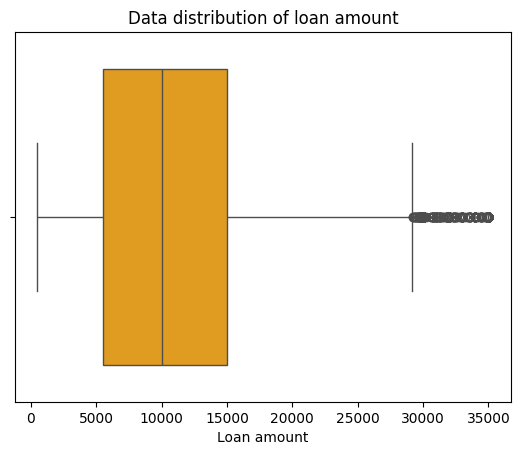

In [48]:
## loan_amnt analysis through box plot
sns.boxplot(x=loan_data["loan_amnt"], color='orange')
plt.title('Data distribution of loan amount')
plt.xlabel('Loan amount')
plt.show()

# Upper fence or 100th percentile is around 29000 and there are few outliers from 29k to 35k which is not too far and will not impact much, hence will not drop any values

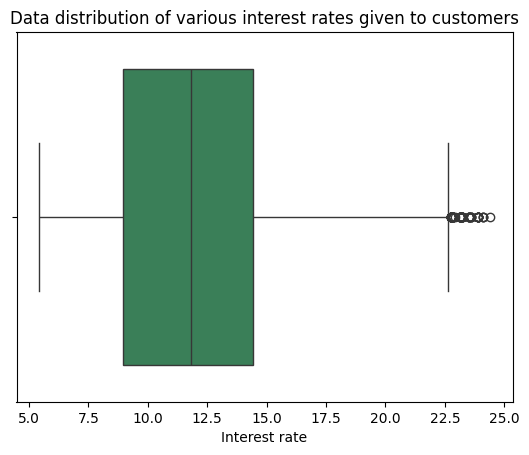

In [49]:
## int_rate analysis through box plot
sns.boxplot(x=loan_data["int_rate"], color='seagreen')
plt.title('Data distribution of various interest rates given to customers')
plt.xlabel('Interest rate')
plt.show()

# Upper fence or 100th percentile is around 22.5 and there are few outliers from 22.5 to 24 which is not too far and will not impact much, hence will not drop any values in the interest column

In [50]:
loan_data.annual_inc.describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

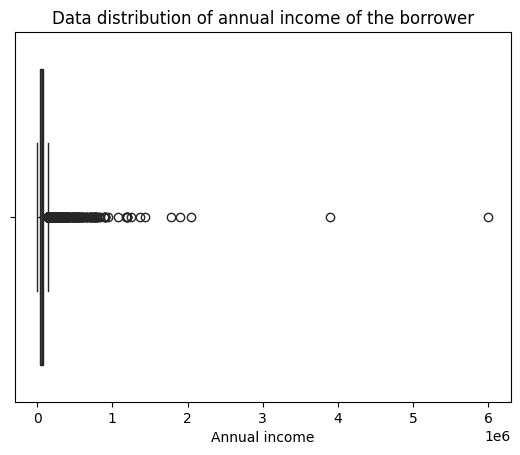

In [51]:
## annual_inc analysis through box plot
sns.boxplot(x=loan_data["annual_inc"], color='green')
plt.title('Data distribution of annual income of the borrower')
plt.xlabel('Annual income')
plt.show()

# Upper fence or 100th percentile is around 1.3-1.4 million and there are outliers above that, hence we need to remove the same so that the mean and other variance metrics do not affect our analysis

Text(0, 0.5, 'Annual income range')

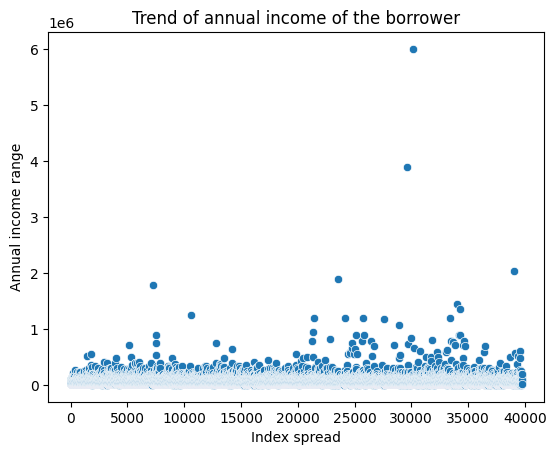

In [52]:
## see the distribution with scatter/line plot to understand the outliers range and remove them
sns.scatterplot(data=loan_data, x=loan_data.index, y='annual_inc')
plt.title('Trend of annual income of the borrower')
plt.xlabel('Index spread')
plt.ylabel('Annual income range')

In [53]:
# removing outliers after greater than the 99th percentile to remove the outliers from the dataset
loan_data=loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

Text(0, 0.5, 'Annual income range')

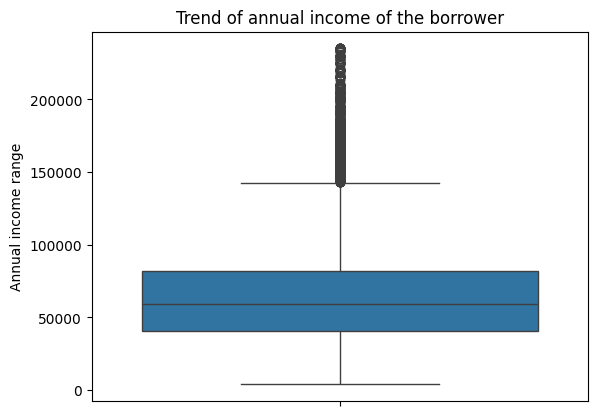

In [54]:
## see the distribution with scatter/line plot after removing the outliers
sns.boxplot(data=loan_data, y='annual_inc')
plt.title('Trend of annual income of the borrower')
plt.ylabel('Annual income range')

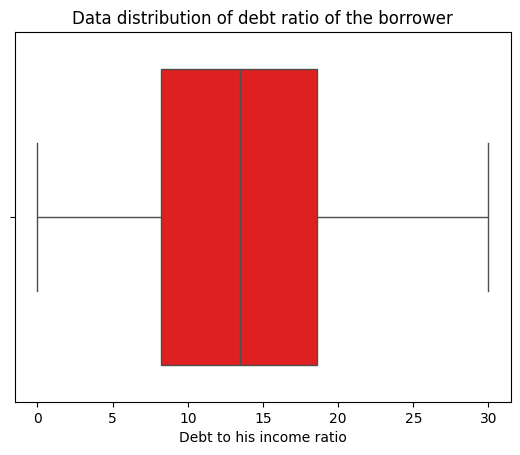

In [55]:
## dti analysis through box plot to see the outliers
sns.boxplot(x=loan_data["dti"], color='red')
plt.title('Data distribution of debt ratio of the borrower')
plt.xlabel('Debt to his income ratio')
plt.show()

# no outliers in this column data

### Univariate analysis

loan_status
Fully Paid     85.580932
Charged Off    14.419068
Name: count, dtype: float64


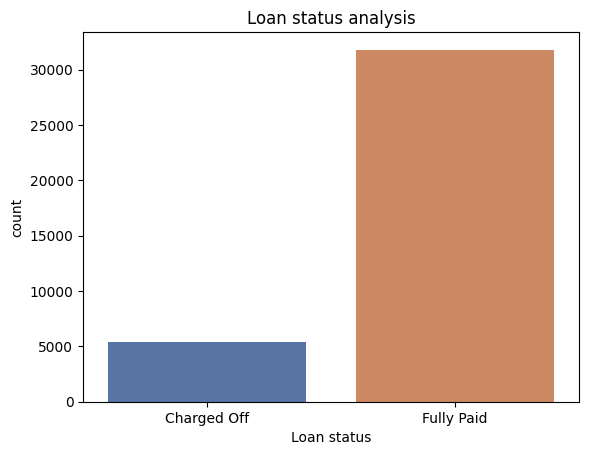

In [57]:
## Loan status
print(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count())
sns.countplot(x=loan_data.loan_status, palette='deep')
plt.title('Loan status analysis')
plt.xlabel('Loan status')
plt.show()

**Conclusion:** Defaulted loans are much less in number and percentage than fully paid

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


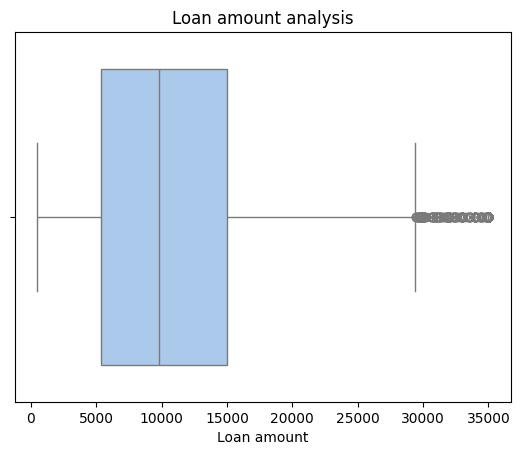

In [59]:
# loan amount analysis and spread
print(loan_data.loan_amnt.describe())

sns.boxplot(x=loan_data.loan_amnt, palette='pastel')
plt.title('Loan amount analysis')
plt.xlabel('Loan amount')
plt.show()

**Conclusion**: Loan amount ranges from 500 to 35000 with mean of 11034

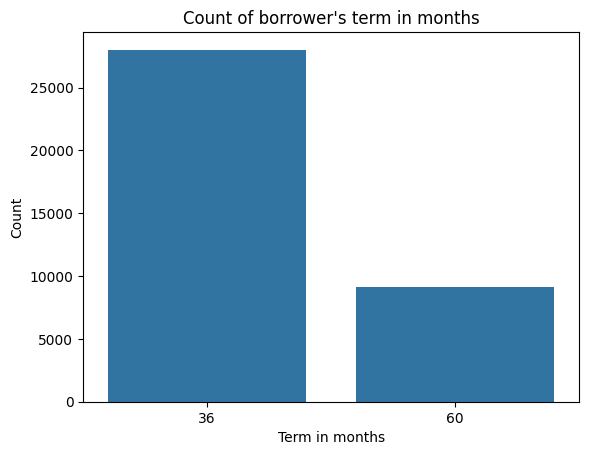

In [61]:
## understand the spread of term and plot the countplot/barplot to understand the spread of borrower's term in months
count=sns.countplot(x=loan_data.term)
count.set_title("Count of borrower's term in months")
count.set_xlabel('Term in months')
count.set_ylabel('Count')
plt.show()

**Inference:** From the plot its evident that most of the loans are taken for 36 months/ 3 years period

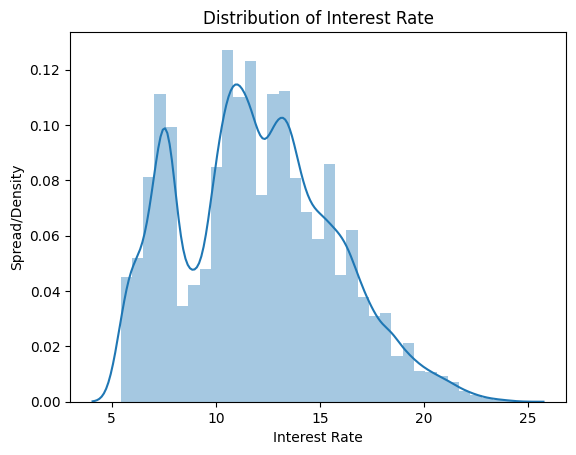

In [63]:
## Distribution of interest rate using dist plot
sns.distplot(sorted(loan_data.int_rate),kde=True,bins=35)
plt.xlabel('Interest Rate')
plt.ylabel('Spread/Density')
plt.title('Distribution of Interest Rate')
plt.show()

**Inference:** From the plot its clear that most of the loans have interest rates of 5-10 and then very few people have 10% interest rate and again there is a peak near 12% which means most of the interest rates offered are in between 5-12 percent with very less people having 10% interest rate

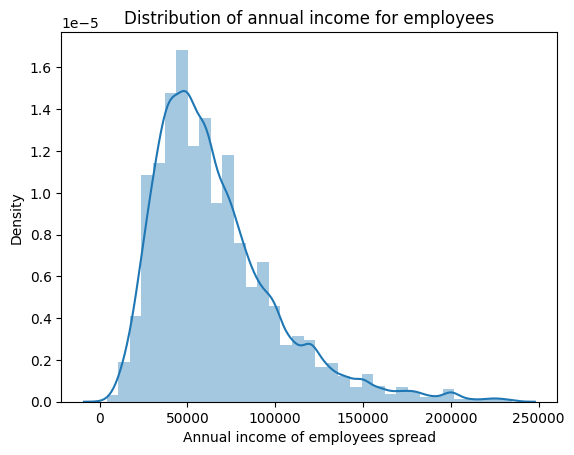

In [65]:
## Distribution of annual income using dist plot
sns.distplot(sorted(loan_data.annual_inc),kde=True,bins=35)
plt.xlabel('Annual income of employees spread')
plt.ylabel('Density')
plt.title('Distribution of annual income for employees')
plt.show()

**Inference:** From the plot most of the loan borrowers have income ranging from 50000-100000 which is less than a million and the normal distribution is clearly left skewed stating majority of the borrowers are low income group.

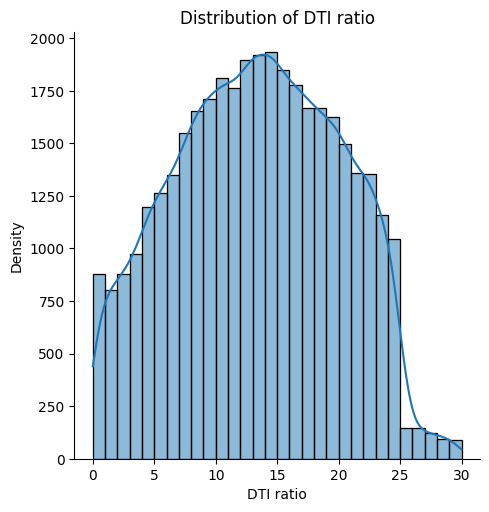

In [67]:
## Distribution of dti
sns.displot(loan_data.dti,kde=True,bins=30)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio')
plt.show()

**Inference:** DTI ratio is more crowded at 10-15 and peak at 15, the ditribution is center skewed which clearly states the debt is more than the income of the borrowers

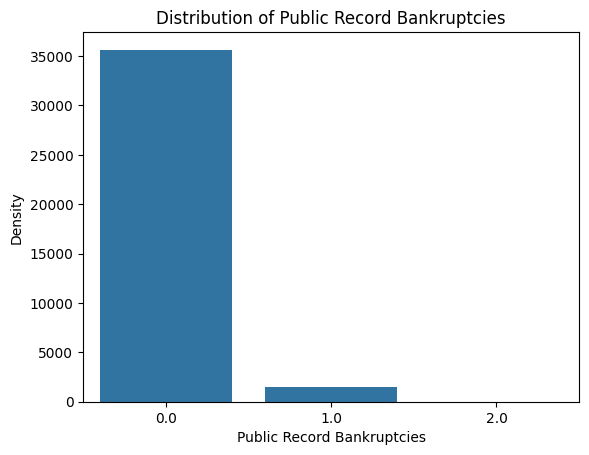

In [69]:
## Distribution of public record bankruptcies
sns.countplot(x=loan_data.pub_rec_bankruptcies)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies')
plt.show()

**Inference:** Majority of borrowers do not have any public recorded bankruptcies

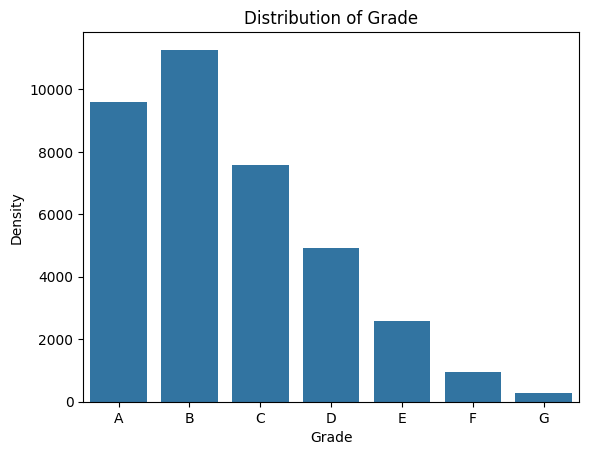

In [71]:
## Distribution of Grade
sns.countplot(x=loan_data.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

**Inference:** Majority of loans are under A and B grades

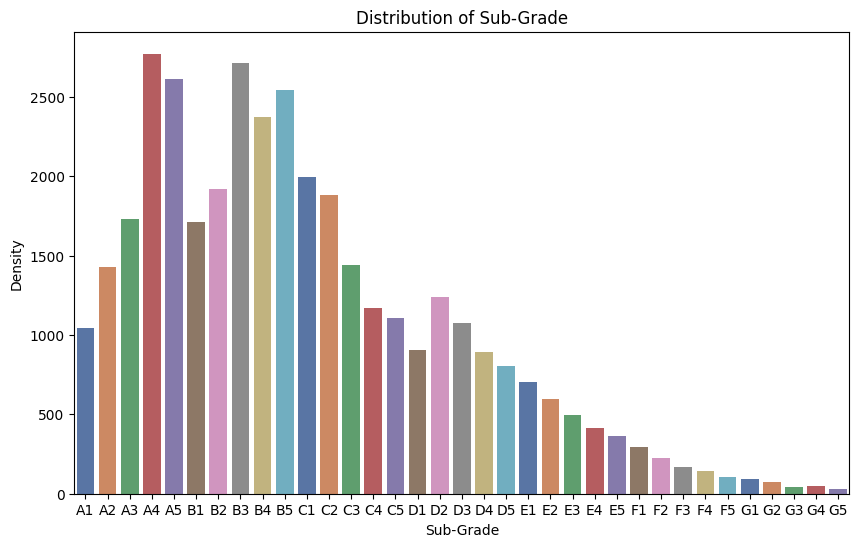

In [73]:
## Distribution of Sub Grade
plt.figure(figsize=(10,6))
sns.countplot(x=loan_data.sub_grade, palette='deep')
plt.xlabel('Sub-Grade')
plt.ylabel('Density')
plt.title('Distribution of Sub-Grade')
plt.show()

**Inference:** Majority of loans are under A4 and A5 under A grade and B4, B5 grades under B

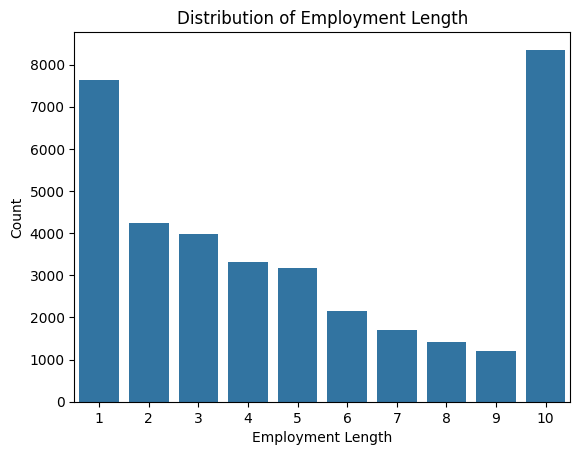

In [75]:
# Distribution of emp_length
sns.countplot(x=loan_data.emp_length)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')
plt.show()

**Inference:** Comparatively most of the borrower's are having 1 yr or 10 years experience

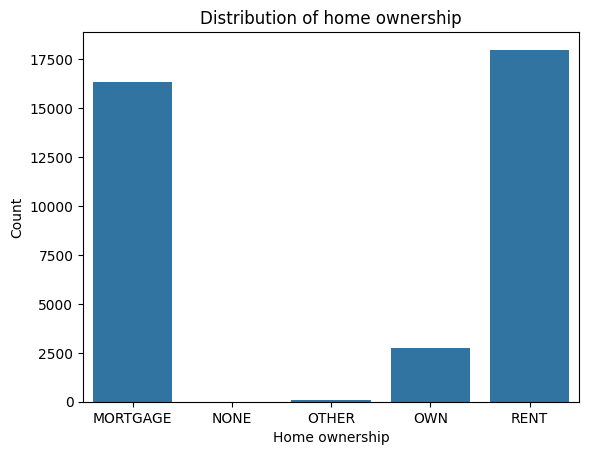

In [77]:
# Distribution of home ownership
sns.countplot(x=loan_data.home_ownership)
plt.xlabel('Home ownership')
plt.ylabel('Count')
plt.title('Distribution of home ownership')
plt.show()

**Inference:** Most of the borrower's either stay in rent or mortgage and do not own a house

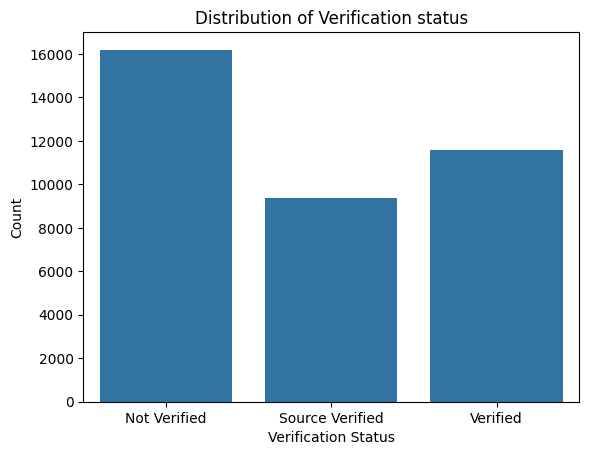

In [79]:
# Distribution of verification status
sns.countplot(x=loan_data.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification status')
plt.show()

**Inference:** Most of applicants are not verified, there will be high chances of defaulters, company should verify the applicants and then lend loans based of the verification to avoid defaulters

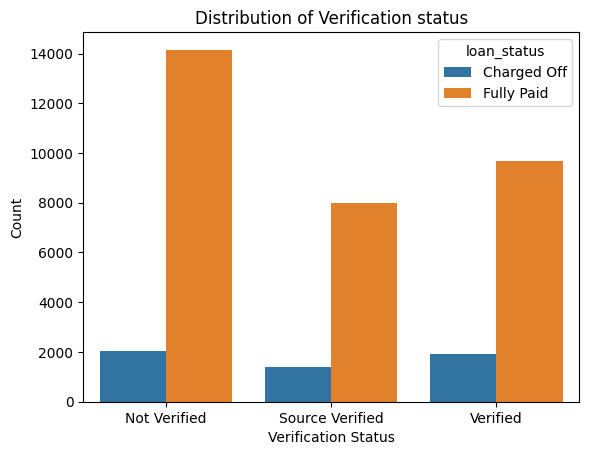

In [81]:
# Distribution of verification status against loan_status
sns.countplot(x=loan_data.verification_status, hue=loan_data.loan_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification status')
plt.show()

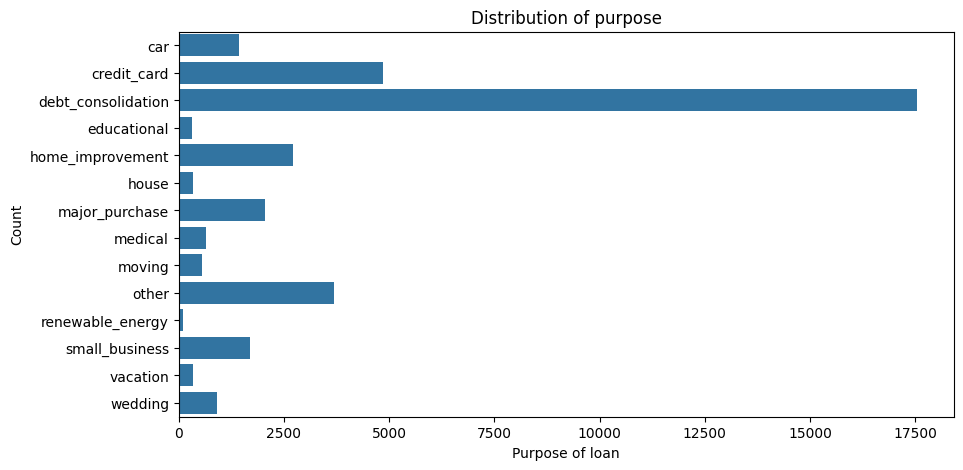

In [82]:
# Distribution of purpose of taking loan
plt.figure(figsize=(10,5))
sns.countplot(y=loan_data.purpose)
plt.xlabel('Purpose of loan')
plt.ylabel('Count')
plt.title('Distribution of purpose')
plt.show()

**Inference:** Majority of loans types are either credit card or debt consolidation loans

### Segmented Univariate Analysis

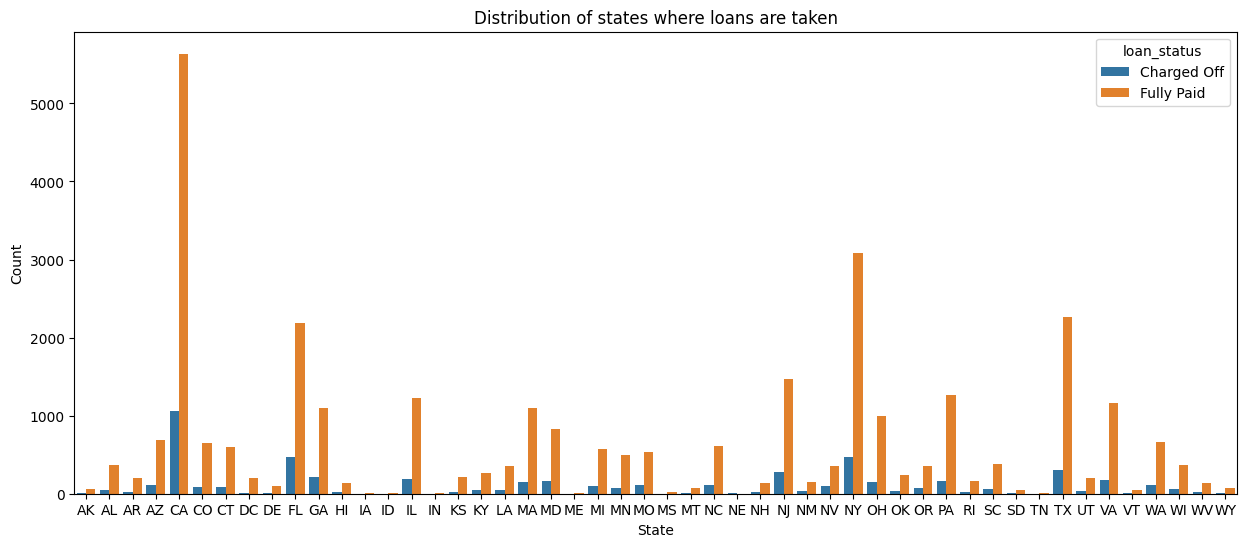

In [85]:
# Distribution of state from which loan is taken and loan status
plt.figure(figsize=(15,6))
sns.countplot(x=loan_data.addr_state, hue=loan_data.loan_status)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of states where loans are taken')
plt.show()

**Inference:** Loans are taken more in CA(California), then in NY(NewYork), TX(Texas) and FL(Florida) and comparatively more loans are defaulted in same states CA, then FL and NY and then TX

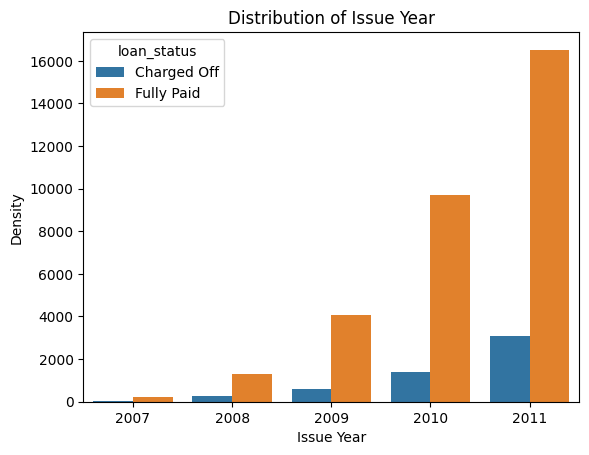

In [87]:
# Distribution of issue_year
sns.countplot(x=loan_data.issue_year, hue=loan_data.loan_status)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Issue Year')
plt.show()

**Inference**: Over the period of time loans lending and defaulting have increased exponentially, This means new loans should be carefully verified based on the parameters and loan should be granted to deal with the credit loss to the company

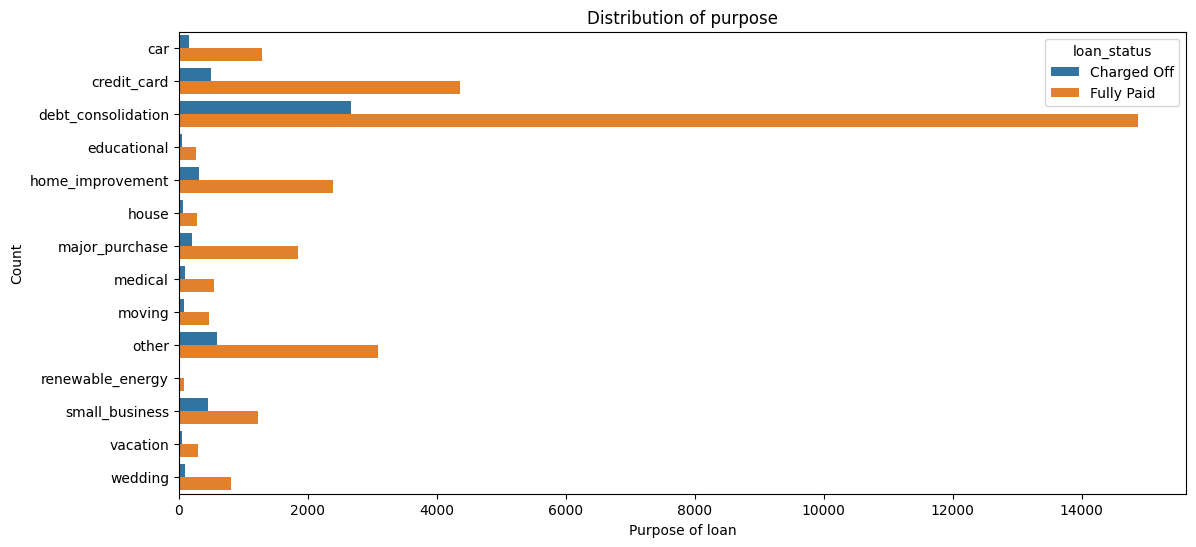

In [89]:
# Distribution of purpose of taking loan based on loan status
plt.figure(figsize=(13,6))
sns.countplot(y=loan_data.purpose, hue=loan_data.loan_status)
plt.xlabel('Purpose of loan')
plt.ylabel('Count')
plt.title('Distribution of purpose')
plt.show()

**Inference:** Debt consolidation and credit card loans are mostly taken loans and also defaulters are more comparatively in these 2 categories along with other type of loans

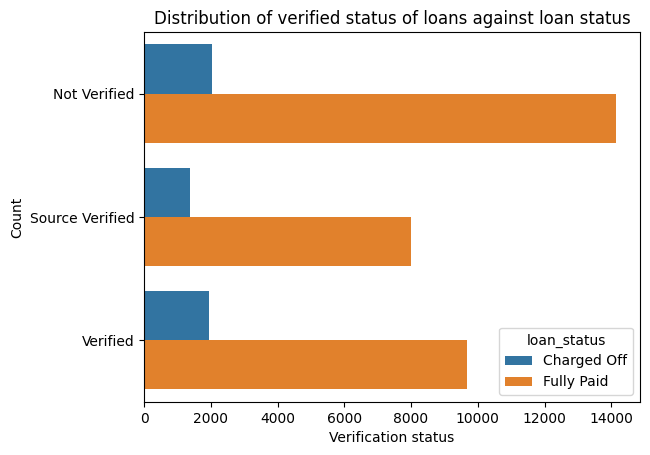

In [91]:
# Check the verification status against loan status and see if non verified loans is defaulted
sns.countplot(y=loan_data.verification_status, hue=loan_data.loan_status)
plt.xlabel('Verification status')
plt.ylabel('Count')
plt.title('Distribution of verified status of loans against loan status')
plt.show()

**Inference:** Clearly non-verified loans are more than verified and source verified and defaulters are slightly more in non verified than verified but not a clear indication for defaulters

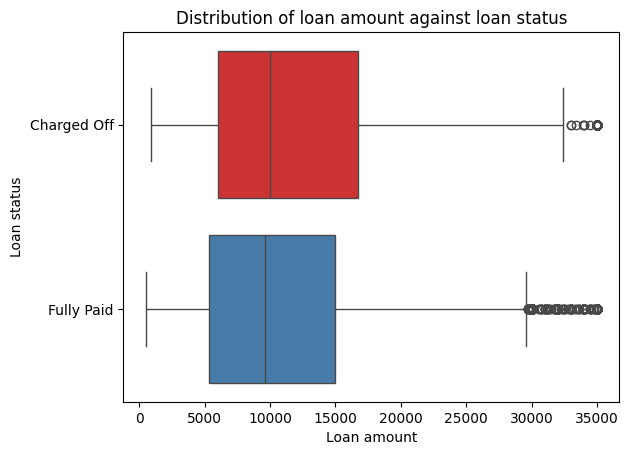

In [93]:
# Check the loan amount against loan status
sns.boxplot(x=loan_data.loan_amnt, y=loan_data.loan_status, palette='Set1')
plt.xlabel('Loan amount')
plt.ylabel('Loan status')
plt.title('Distribution of loan amount against loan status')
plt.show()

**Inference:** The mean of fully paid and the charged off are almost same and has larger 75th percentile in the defaulted loan, which means there are chances of defaulting in majority of loan where the loan amount is higher

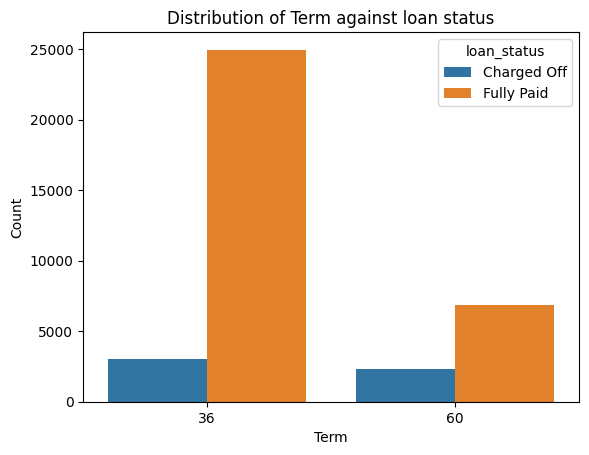

In [95]:
# Check the term based on loan status and its trend
sns.countplot(x=loan_data.term, hue=loan_data.loan_status)
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term against loan status')
plt.show()

**Inference:** 36 months tenure loans are more than 60 and also the defaulters in 36 months is comparatively more than 60

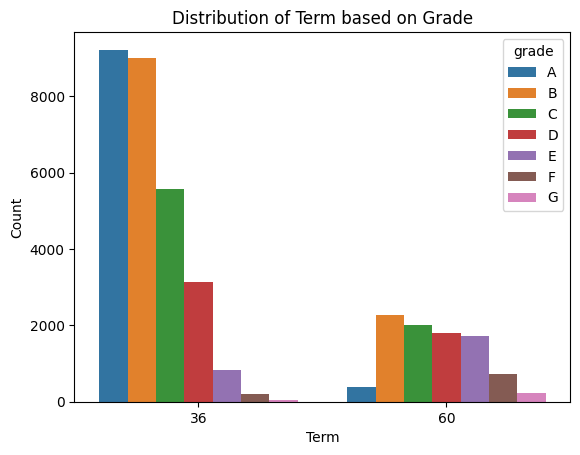

In [97]:
# Distribution of Term based on Grade
sns.countplot(data=loan_data,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term based on Grade')
plt.show()

**Inference:** Loans of type A, B, C majorly have 36 months as tenure and B, C and D has more 60 months as tenure

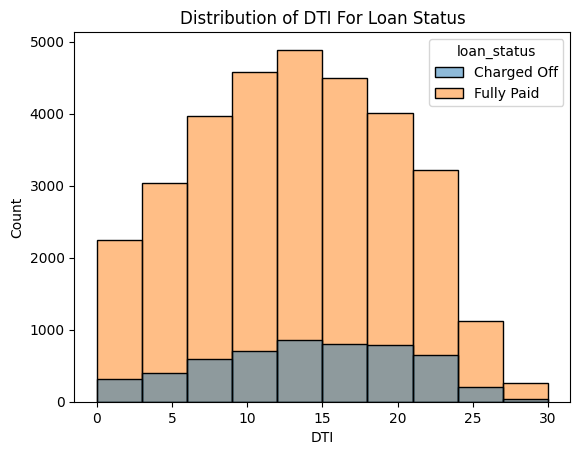

In [99]:
# Distribution of DTI based on Grade
sns.histplot(data=loan_data,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

**Inference:** Loan status varies with DTI ratio, 10-15 have higher number of defaulted loan and its evident that higher DTI ratio has higher chances of defaulting 

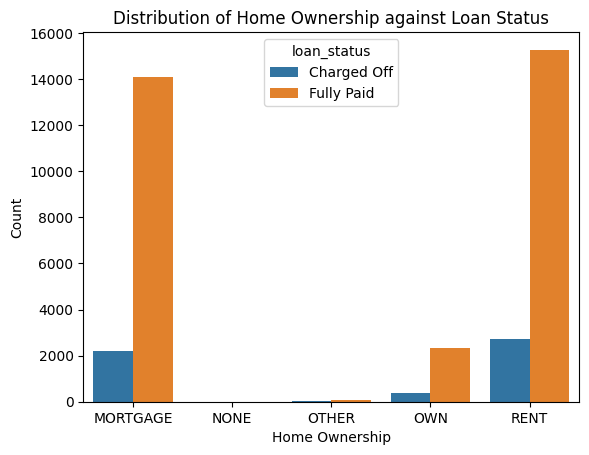

In [101]:
# Distribution of house_ownership based on loan_status
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership against Loan Status')
plt.show()

**Inference:** Large number of loan applicants are either staying in mortgage or rent and also the defaulters are more in these 2 categories than who possess their own property

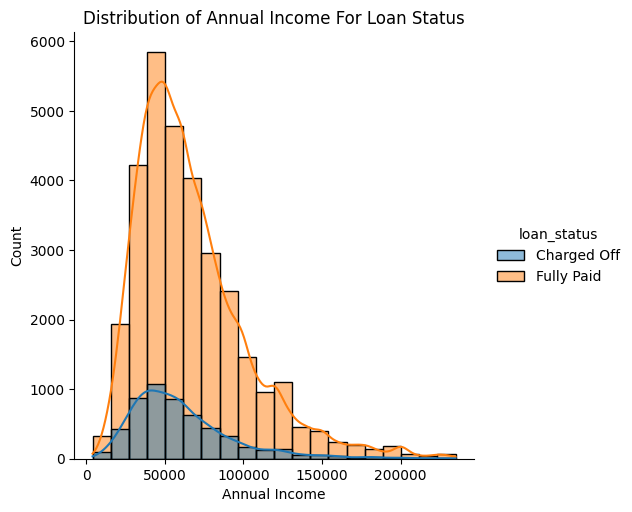

In [103]:
# Analysis of annual_inc against loan_status
sns.displot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status')
plt.show()

**Inference:** From the plot its evident that defaulters are more in the income group of less than 50k and 50-55k is next peak of defaulters which are low income group, which states clearly when the income is less there is high chance of defaulting loan

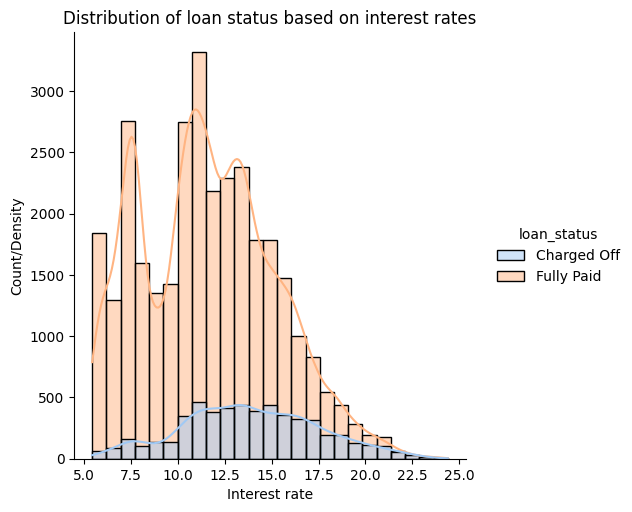

In [105]:
# Distribution of loan status based on interest rate
sns.displot(data=loan_data,x='int_rate',hue='loan_status',bins=25,kde=True, palette='pastel')
plt.xlabel('Interest rate')
plt.ylabel('Count/Density')
plt.title('Distribution of loan status based on interest rates')
plt.show()

**Inference:** Defaulted loans are between 10-17.5% consistently and dipped after that point and decreased as the interest rate increases post 17.5

In [107]:
print(loan_data.columns)

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'issue_year', 'issue_month'],
      dtype='object')


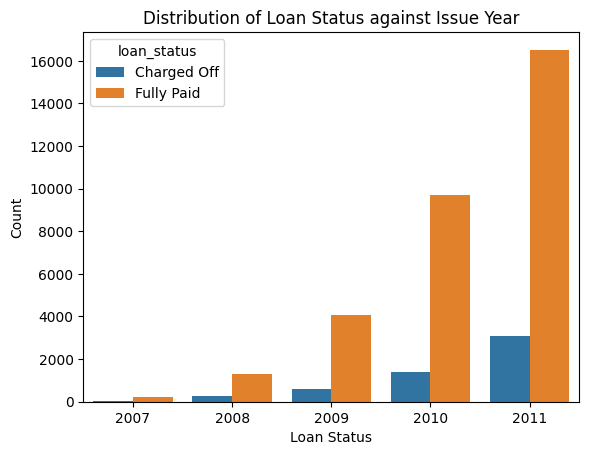

In [108]:
# Distribution of loan_status against issue_year
sns.countplot(data=loan_data,x=loan_data.issue_year, hue=loan_data.loan_status)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status against Issue Year')
plt.show()

**Inference:** Over the period of time there is increase in loan approval as well as defaulting of loans, lets see the percentage of defaulters over the period of time and draw inference from it

In [110]:
bins=[2007, 2008, 2009, 2010, 2011]
labels=['2007-2008', '2008-2009', '2009-2010', '2010-2011']
loan_data['year_bin'] = pd.cut(loan_data.issue_year, bins=bins, labels=labels, include_lowest=True)
print(loan_data['year_bin'].isna().sum())
loan_data.head(3)

0


,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,year_bin
0,1077501,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,2011,12,2010-2011
1,1077430,2500,60,15.27,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,2011,12,2010-2011
2,1077175,2400,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0.0,2011,12,2010-2011


In [111]:
# Calculate percentages of charged-off loans
charged_off = loan_data[loan_data.loan_status == 'Charged Off']
fully_paid = loan_data[loan_data.loan_status == 'Fully Paid']
total_counts = loan_data['year_bin'].value_counts().sort_index()
charged_off_counts = charged_off['year_bin'].value_counts().sort_index()
fully_paid_counts = fully_paid['year_bin'].value_counts().sort_index()
charged_off_perc = (charged_off_counts / total_counts) * 100
fully_paid_perc = (fully_paid_counts / total_counts) * 100
print(charged_off_perc)
print(fully_paid_perc)

year_bin
2007-2008    16.064480
2008-2009    12.647374
2009-2010    12.557427
2010-2011    15.743574
Name: count, dtype: float64
year_bin
2007-2008    83.935520
2008-2009    87.352626
2009-2010    87.442573
2010-2011    84.256426
Name: count, dtype: float64


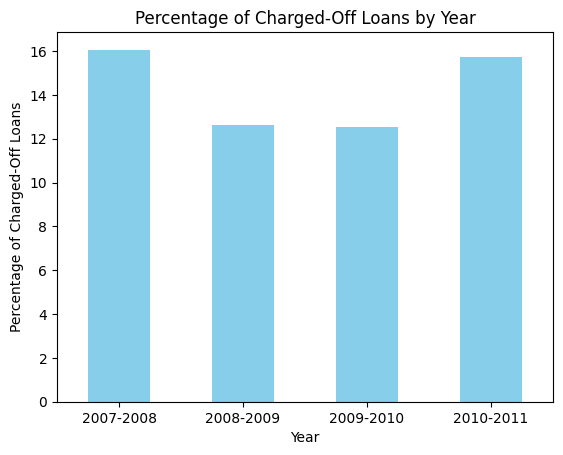

In [112]:
# Plot the results
charged_off_perc.plot(kind='bar', color='skyblue')
plt.title('Percentage of Charged-Off Loans by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Charged-Off Loans')
plt.xticks(rotation=0)
plt.show()

**Inference:** No clear evidence with the loan approval is increasing exponentially, the defaulted loans increase

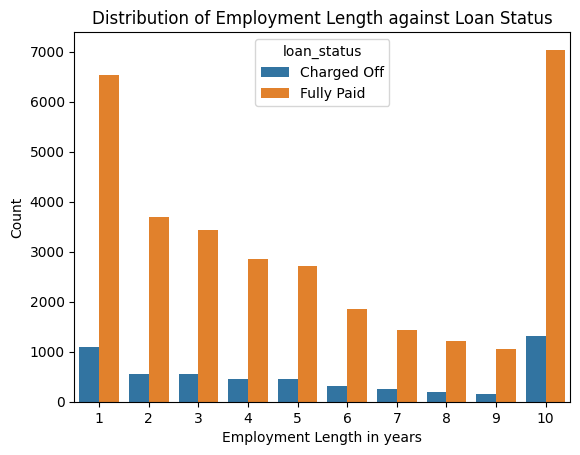

In [114]:
# Distribution of employee experience based on loan status
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length against Loan Status')
plt.show()

**Inference:** We can see that the defaulters are more when the employee experience is 10 years which has the highest number loan borrowers too, next is who has 1 year experience, we can come to assumption that when the employee experience is 1 year spends more on credit card and with limited financial management defaults more and a person who has more than 10 years might have a proper family and loans could be defaulted with more responsibilities, also this segment has higher chance of clear their debts too

### Bivariate analysis

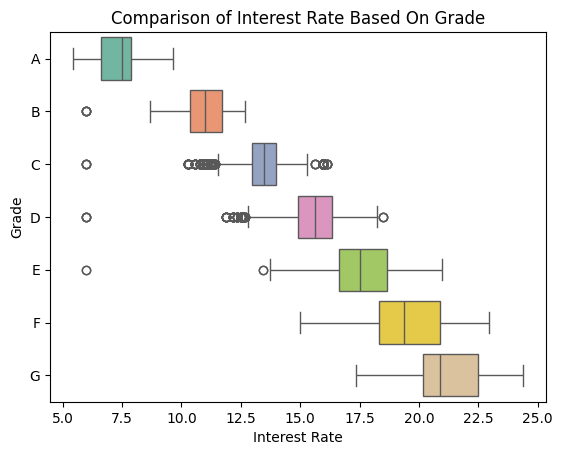

In [117]:
#Comparison of interest rate based on grade
sns.boxplot(data=loan_data,x='int_rate',y='grade', palette='Set2')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade')
plt.show()

**Inference:** Grades are given based on risk assessment of a borrower, A type loan is the lowest risk and clearly the interest rate increase with the higher risk loans 

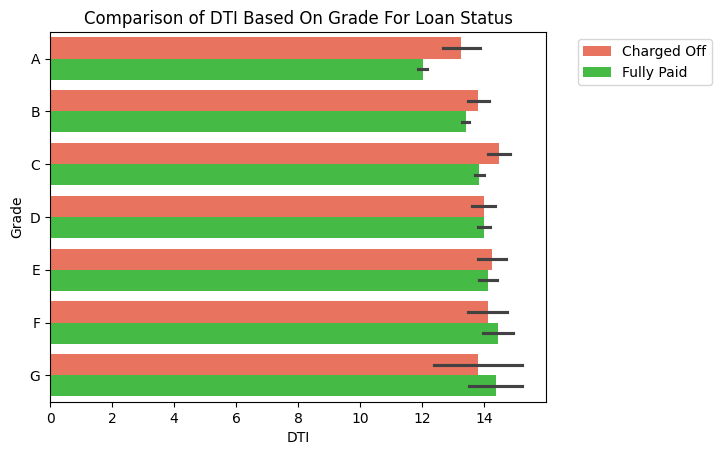

In [236]:
# Comparison of DTI over grade against loan status
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
palette = sns.color_palette(["#8B0000", "#006400"])
sns.set_palette(palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status')

plt.show()

**Inference:** The Grade A loan which has lowest risk also has lowest DTI ratio which states that higher grade loan has lower rate of default

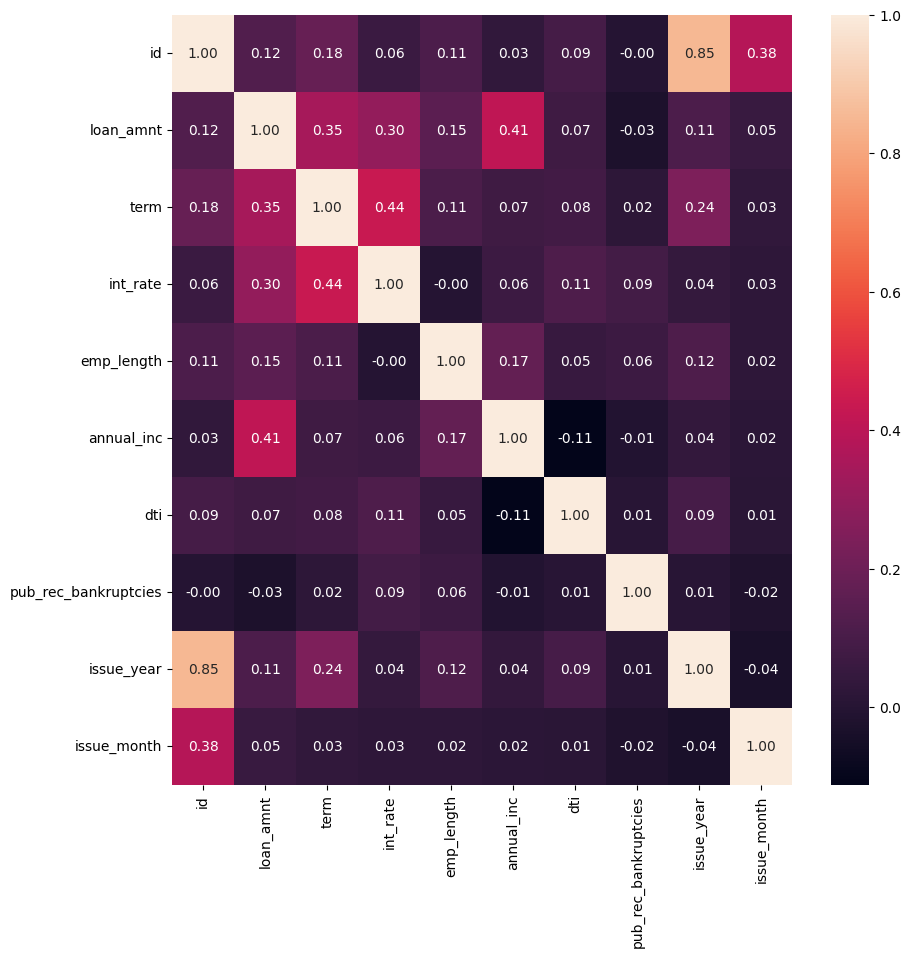

In [121]:
# Heatmap of corr between variables
plt.figure(figsize=(10,10))
numeric_loan_data = loan_data.select_dtypes(include=[float, int])
sns.heatmap(data=numeric_loan_data.corr(),annot=True, fmt='.2f')
plt.show()

## Insights
### Univariate Analysis
 - The number of defaulted loan is 7 times less than the number of fully paid loan.
 - The majority of loan has a term of 36 months compared to 60 months.
 - The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
 - A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
 - Majority of borrowsers have working experience greater than 10 years.
 - Majority of borrowsers don't posses property and are on mortage or rent.
 - About 50% of the borrowers are verified by the company or have source verified.
 - Annual Income shows left skewed normal distribution thus we can say that the majorityof burrowers have very low annual income compared to rest.
 - A large percentage of loans are taken for debt consolidation followed by credit card.
 - Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
 - Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
 - Majority of the borrowers have no record of Public Recorded Bankruptcy.
 - Majority of the loans are given in last quarter of the year.
 - The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis
 - Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
 - The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
 - The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
 - The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
 - The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
 - The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
 - Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
 - The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
 - The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
 - The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis
 - The Grade represent risk factor thus we can say interst rate increases with the risk.
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
 - The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

Recommendations
- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
    1. DTI 
    2. Grades
    3. Verification Status
    4. Annual income
    5. Pub_rec_bankruptcies
- Other considerations for 'defaults' :
    1. Burrowers not from large urban cities like california, new york, texas, florida etc. 
    2. Burrowers having annual income in the range 50000-100000.
    3. Burrowers having Public Recorded Bankruptcy.
    4. Burrowers with least grades like E,F,G which indicates high risk.
    5. Burrowers with very high Debt to Income value.
    6. Burrowers with working experience 10+ years.